In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [28]:
def add_layer(inputs,in_size,out_size,activation_function=None):
    #展示层中wx+b的过程
    Weights=tf.Variable(tf.random_normal([in_size,out_size]))
    biases=tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b=tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs=Wx_plus_b
    else:
        outputs=activation_function(Wx_plus_b)
        
    return outputs

In [29]:
x_data=np.linspace(-1,1,300).reshape(-1,1)
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)+noise

In [30]:
xs=tf.placeholder(tf.float32,[None,1])
ys=tf.placeholder(tf.float32,[None,1])

In [31]:
l1=add_layer(xs,1,10,tf.nn.relu)
prediction=add_layer(l1,10,1,None)
loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [32]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)


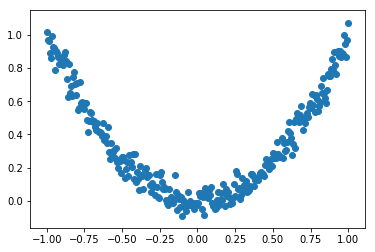

In [33]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()


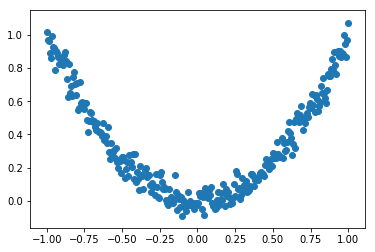

loss_: 0.0026490628
loss_: 0.0026489191
loss_: 0.0026487815
loss_: 0.0026486502
loss_: 0.0026485252
loss_: 0.0026484057
loss_: 0.0026482907
loss_: 0.00264818
loss_: 0.0026480767
loss_: 0.0026479175
loss_: 0.0026477673
loss_: 0.0026476264
loss_: 0.002647493
loss_: 0.0026473675
loss_: 0.0026472472
loss_: 0.0026471312
loss_: 0.0026470192
loss_: 0.0026469133
loss_: 0.0026468113
loss_: 0.0026467114


In [41]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50==0:
        loss_=sess.run(loss,feed_dict={xs:x_data,ys:y_data})
        print("loss_:",loss_)
        prediction_=sess.run(prediction,feed_dict={xs:x_data,ys:y_data})
        try:
            ax.lines.remove(lines[0])
        except Exception as e:
            pass
        lines=ax.plot(x_data,prediction_,'r-',lw=5)
#         plt.ion()
#         plt.show()
        plt.pause(0.1)
        